In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision.datasets
from bokeh.plotting import figure
from bokeh.io import show
from bokeh.models import LinearAxis, Range1d
import numpy as np
import torch.nn.functional as f

print("Starting experiment...")

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#Normal Training

# Hyperparameters
num_epochs = 6
num_classes = 10
batch_size = 100
learning_rate = 0.001

DATA_PATH = 'datasets/'
MODEL_STORE_PATH = 'trained_models/'

# transforms to apply to the data
#trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trans = transforms.Compose([transforms.ToTensor()])

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True)
test_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans)

# Data loader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        #self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 64, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        #out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out


model = ConvNet()
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Run the forward pass
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

# Save the model and plot
torch.save(model.state_dict(), MODEL_STORE_PATH + 'conv_net_model.ckpt')

p = figure(y_axis_label='Loss', width=850, y_range=(0, 1), title='PyTorch ConvNet results')
p.extra_y_ranges = {'Accuracy': Range1d(start=0, end=100)}
p.add_layout(LinearAxis(y_range_name='Accuracy', axis_label='Accuracy (%)'), 'right')
p.line(np.arange(len(loss_list)), loss_list)
p.line(np.arange(len(loss_list)), np.array(acc_list) * 100, y_range_name='Accuracy', color='red')
show(p)

Starting experiment...


KeyboardInterrupt: 

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision.datasets
from bokeh.plotting import figure
from bokeh.io import show
from bokeh.models import LinearAxis, Range1d
import numpy as np
import torch.nn.functional as f

print("Starting experiment...")

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#Adversarial Training

# Hyperparameters
num_epochs = 6
num_classes = 10
batch_size = 100
learning_rate = 0.0001

DATA_PATH = 'datasets/'
MODEL_STORE_PATH = 'trained_models/'

# transforms to apply to the data
#trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trans = transforms.Compose([transforms.ToTensor()])

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True)
test_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans)

# Data loader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(10, 20, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        #self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 20, 2000)
        self.fc2 = nn.Linear(2000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        #out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out


model = ConvNet()
model = model.to(device)



# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
loss_list = []
acc_list = []

rob_thold = 0.3
lrate_adv = 4e-2

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Run the forward pass
        images, labels = images.to(device), labels.to(device)
        images_original = images.clone()

        for j in range(10):
            images.requires_grad = True
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()

            with torch.no_grad():
                images_grad_step = lrate_adv*torch.sign(images.grad)

                #Take grad step
                images += images_grad_step

                #Project
                images = images_original + torch.clamp(images-images_original, -rob_thold, rob_thold)
                images = torch.clamp(images,0,1)
        
        images.requires_grad = False
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

# Save the model and plot
torch.save(model.state_dict(), MODEL_STORE_PATH + 'conv_net_model.ckpt')

p = figure(y_axis_label='Loss', width=850, y_range=(0, 1), title='PyTorch ConvNet results')
p.extra_y_ranges = {'Accuracy': Range1d(start=0, end=100)}
p.add_layout(LinearAxis(y_range_name='Accuracy', axis_label='Accuracy (%)'), 'right')
p.line(np.arange(len(loss_list)), loss_list)
p.line(np.arange(len(loss_list)), np.array(acc_list) * 100, y_range_name='Accuracy', color='red')
show(p)

Starting experiment...
Epoch [1/6], Step [100/600], Loss: 2.3018, Accuracy: 11.00%
Epoch [1/6], Step [200/600], Loss: 2.2533, Accuracy: 21.00%
Epoch [1/6], Step [300/600], Loss: 2.1724, Accuracy: 23.00%
Epoch [1/6], Step [400/600], Loss: 2.1385, Accuracy: 28.00%
Epoch [1/6], Step [500/600], Loss: 2.0158, Accuracy: 29.00%
Epoch [1/6], Step [600/600], Loss: 1.8882, Accuracy: 29.00%
Epoch [2/6], Step [100/600], Loss: 1.9639, Accuracy: 33.00%
Epoch [2/6], Step [200/600], Loss: 1.7675, Accuracy: 33.00%
Epoch [2/6], Step [300/600], Loss: 1.7053, Accuracy: 37.00%
Epoch [2/6], Step [400/600], Loss: 1.8603, Accuracy: 36.00%
Epoch [2/6], Step [500/600], Loss: 1.7498, Accuracy: 36.00%
Epoch [2/6], Step [600/600], Loss: 1.6862, Accuracy: 44.00%
Epoch [3/6], Step [100/600], Loss: 1.5301, Accuracy: 43.00%
Epoch [3/6], Step [200/600], Loss: 1.5630, Accuracy: 42.00%
Epoch [3/6], Step [300/600], Loss: 1.4773, Accuracy: 48.00%
Epoch [3/6], Step [400/600], Loss: 1.6341, Accuracy: 37.00%
Epoch [3/6], Step

In [84]:
# Test the model on adversrial examples
from torch.autograd import Variable

for param in model.parameters():
    param.requires_grad=False

rob_thold = 0.2
lrate_adv = 4e-2

model.eval()

correct = 0
total = 0
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    images_original = images.clone()
    
    for i in range(50):
        images.requires_grad = True
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()

        with torch.no_grad():
            
            ##l-inf attack
            images_grad_step = lrate_adv*torch.sign(images.grad)
            
            #Take grad step
            images += images_grad_step
            
            #Project
            images = images_original + torch.clamp(images-images_original, -rob_thold, rob_thold)
            images = torch.clamp(images,0,1)
            ##l-inf attack ends
        

            
    outputs = model(images)  
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

# Save the model and plot
torch.save(model.state_dict(), MODEL_STORE_PATH + 'conv_net_model.ckpt')


Test Accuracy of the model on the 10000 test images: 83.35000000000001 %


In [50]:
print(images.min())

tensor(0., device='cuda:0')


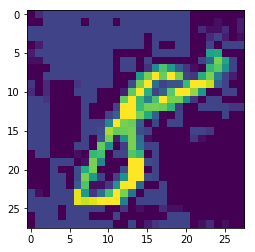

In [86]:
from matplotlib import pyplot as plt
%matplotlib inline

images_np = images.cpu().numpy()
plt.imshow(images_np[10,0])